In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.offline as pyo
# from plotnine import *
# pyo.init_notebook_mode()

In [2]:
total_data = pd.read_excel('./sleep_data.xlsx')
total_data.head()

/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_17857/3058593460.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  total_data = pd.read_excel('./sleep_data.xlsx')


,ID,PSG_date,PSG_ID,sex,age,birth,Final Diagnosis,OSA,insomnia,"PLMD, RLS",...,Lowest SaO2 (%),ODI,90%ODI,EtCO2\n(>50mmHg),Total \nLMI =PLMI(/h),Total LM \nArousal#,Total LM AI(/h),PLM \nArousal#,PLM \nAI(/h),MAI(/h)
0,1,2014-12-10,N14005,1,52,1962-02-26,sleep talking,0,0,0,...,97.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014-12-10,PE141015,0,65,1948-12-17,RLS/OSA,1,0,1,...,87.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN,NaN,NaN
2,3,2014-12-10,PE141017,0,53,1961-02-28,OSA,1,0,0,...,87.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN,NaN,NaN
3,4,2014-12-10,PE141014,0,53,1961-06-01,OSA/PPI,1,1,0,...,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-03-31,PE150253,1,55,1959-12-19,OSA,1,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3


In [3]:
total_data.rename(columns={'신장':'height', '체중':'weight'}, inplace=True)
total_data.head()

,ID,PSG_date,PSG_ID,sex,age,birth,Final Diagnosis,OSA,insomnia,"PLMD, RLS",...,Lowest SaO2 (%),ODI,90%ODI,EtCO2\n(>50mmHg),Total \nLMI =PLMI(/h),Total LM \nArousal#,Total LM AI(/h),PLM \nArousal#,PLM \nAI(/h),MAI(/h)
0,1,2014-12-10,N14005,1,52,1962-02-26,sleep talking,0,0,0,...,97.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014-12-10,PE141015,0,65,1948-12-17,RLS/OSA,1,0,1,...,87.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN,NaN,NaN
2,3,2014-12-10,PE141017,0,53,1961-02-28,OSA,1,0,0,...,87.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN,NaN,NaN
3,4,2014-12-10,PE141014,0,53,1961-06-01,OSA/PPI,1,1,0,...,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-03-31,PE150253,1,55,1959-12-19,OSA,1,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3


In [4]:
na_columns = total_data.isna().sum()
na_columns

ID                       0
PSG_date                 0
PSG_ID                   0
sex                      0
age                      0
                      ... 
Total LM \nArousal#    207
Total LM AI(/h)        207
PLM \nArousal#         208
PLM \nAI(/h)           208
MAI(/h)                207
Length: 90, dtype: int64

In [5]:
total_data[total_data['Lateral Apnea \nIndex(/h)'].apply(lambda x: isinstance(x, str))]

,ID,PSG_date,PSG_ID,sex,age,birth,Final Diagnosis,OSA,insomnia,"PLMD, RLS",...,Lowest SaO2 (%),ODI,90%ODI,EtCO2\n(>50mmHg),Total \nLMI =PLMI(/h),Total LM \nArousal#,Total LM AI(/h),PLM \nArousal#,PLM \nAI(/h),MAI(/h)
5076,5077,2018-08-02,PE180560,1,62,1956-05-16,OSA,1,0,0,...,81.0,40.8,18.1,0.0,11.0,0.0,0.0,0.0,0.0,0.0


In [6]:
total_data.drop([5076], inplace=True)
total_data[total_data['Lateral Apnea \nIndex(/h)'].apply(lambda x: isinstance(x, str))]

,ID,PSG_date,PSG_ID,sex,age,birth,Final Diagnosis,OSA,insomnia,"PLMD, RLS",...,Lowest SaO2 (%),ODI,90%ODI,EtCO2\n(>50mmHg),Total \nLMI =PLMI(/h),Total LM \nArousal#,Total LM AI(/h),PLM \nArousal#,PLM \nAI(/h),MAI(/h)


In [7]:
total_data[total_data['control'] == 999].index
total_data.drop([3570], inplace=True)

In [8]:
total_data['Lateral Apnea \nIndex(/h)'] = total_data['Lateral Apnea \nIndex(/h)'].astype(float)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479 entries, 0 to 5480
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   ID                                    5479 non-null   int64         
 1   PSG_date                              5479 non-null   datetime64[ns]
 2   PSG_ID                                5479 non-null   object        
 3   sex                                   5479 non-null   int64         
 4   age                                   5479 non-null   int64         
 5   birth                                 5479 non-null   object        
 6   Final Diagnosis                       5479 non-null   object        
 7   OSA                                   5479 non-null   int64         
 8   insomnia                              5479 non-null   int64         
 9   PLMD, RLS                             5479 non-null   int64         
 10  

## 수치형 데이터 분석

In [9]:
numerical_data = total_data.iloc[:, 15:]
numerical_data.describe()

,height,weight,BMI,Time in \nBed(min),Total sleep\ntime(min),Sleep\nlatency(min),N2 sleep\nlatency(min),REM sleep \nlatency(min),WASO(min),WASO(%),...,Lowest SaO2 (%),ODI,90%ODI,EtCO2\n(>50mmHg),Total \nLMI =PLMI(/h),Total LM \nArousal#,Total LM AI(/h),PLM \nArousal#,PLM \nAI(/h),MAI(/h)
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.00000,5478.000000,5479.000000,5478.000000,5478.000000,...,5444.000000,5479.000000,5479.000000,5479.000000,5343.000000,5272.000000,5272.000000,5271.000000,5271.000000,5272.000000
mean,167.996021,73.129148,27.485583,431.501661,355.426720,12.13674,7.389011,104.387662,50.598357,12.204053,...,84.538024,17.892663,6.473243,0.018799,10.489519,1.703149,0.293295,3.934168,0.693180,0.992242
std,24.140964,36.285992,43.772167,52.672357,66.684098,18.98400,14.025512,64.199164,50.058176,11.909136,...,8.159749,21.904523,15.582607,0.858835,21.037599,4.068668,0.702324,12.568402,2.223215,2.591902
min,100.000000,30.000000,12.400000,96.900000,46.500000,0.00000,0.000000,0.000000,0.000000,0.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,62.000000,22.900000,403.000000,318.000000,3.00000,1.000000,65.500000,14.400000,3.425000,...,81.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,168.000000,71.000000,25.100000,436.000000,362.000000,6.50000,3.500000,87.000000,38.500000,9.300000,...,86.000000,9.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,174.000000,80.000000,27.640000,467.000000,402.500000,13.00000,7.500000,127.500000,72.000000,17.400000,...,90.000000,27.650000,4.500000,0.000000,12.400000,2.000000,0.300000,1.000000,0.200000,0.700000
max,999.000000,999.000000,999.000000,642.000000,537.500000,303.00000,224.000000,475.500000,410.000000,87.400000,...,99.000000,141.900000,169.400000,44.500000,187.300000,129.000000,21.500000,218.000000,37.500000,38.800000


### 단위별로 그룹화
barplot으로 plot해 보기 위해 같은 단위를 쓰는 feature들 그룹화

In [10]:
count_data = total_data.loc[:, total_data.columns.str.contains("#")]
count_data.head()

,Total\nArousal #,Respriratory\nArousal #,Snore \nArousal #,RERA \nArousal #,Spontaneous \nArousal #,Movement \nArousal #,Central \napnea #,Mixed\n_apnea #,Obstructive \napnea #,Total_\napnea #,Total_\nHypopnea#,Total \nA+H #,Total-\nRERA#,Total-\nA+H+RERA#,Total LM \nArousal#,PLM \nArousal#
0,52.0,1.0,0.0,0,0.0,0.0,0,0,0,0.0,1.0,1,0.0,1.0,NaN,NaN
1,88.0,37.0,0.0,0,0.0,6.0,0,0,22,22.0,19.0,41,7.0,48.0,NaN,NaN
2,200.0,160.0,0.0,0,0.0,0.0,2,4,103,109.0,110.0,219,29.0,248.0,NaN,NaN
3,131.0,86.0,1.0,0,0.0,0.0,0,0,8,8.0,102.0,110,24.0,134.0,NaN,NaN
4,84.0,20.0,2.0,0,0.0,2.0,0,0,1,1.0,70.0,71,17.0,88.0,2.0,0.0


In [11]:
index_data = total_data.loc[:, total_data.columns.str.contains("Index|index|/h|ODI")]
index_data.head()

,Total Aroual \nindex(/h),Respiratory \nAroual index(/h),Snore Aroual \nindex(/h),RERA \nindex(/h),Spontaneous \nAroual index(/h),Movement \nAroual index(/h),REM Arousal \nindex(h),NREM Arousal \nindex(h),Supine \nArousal index(h),Lateral \nArousal index(h),...,Supine0\nA+H+RERA_Index(h),Lateral A+H+RERA_\nIndex(h),REM A+H+RERA \nIndex(/h),NREM A+H+RERA \nIndex(/h),ODI,90%ODI,Total \nLMI =PLMI(/h),Total LM AI(/h),PLM \nAI(/h),MAI(/h)
0,11.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,21.3,9.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,0.0,...,20.9,0.0,0.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN
2,28.5,22.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.8,0.0,0.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN
3,22.9,15.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,12.1,2.9,0.3,0.0,0.0,0.3,7.0,0.0,0.0,11.3,...,15.4,2.1,0.0,0.0,0.0,0.0,3.2,0.3,0.0,0.3


In [12]:
percent_data = total_data.loc[:, total_data.columns.str.contains("%|SaO2")]
percent_data.drop(["90%ODI"], axis=1, inplace=True) # odi는 index
percent_data.head()

/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_17857/169675653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_data.drop(["90%ODI"], axis=1, inplace=True)


,WASO(%),NON\nREM/TST(%),N1/TST(%),N2/TST(%),N3/TST(%),REM/TST(%),sleep efficiency(%),Sleep time \non Back(%),Resp. Arousal\n/(A+H)(%),Baseline waking \nSaO2,Baseline \nsleep SaO2,Lowest SaO2 (%)
0,0.0,79.4,17.0,62.0,0.4,20.6,73.5,49.5,100.0,99.0,99.0,97.0
1,0.0,83.7,23.2,60.5,0.0,16.3,48.3,50.6,90.2,97.0,97.0,87.0
2,0.0,71.0,29.0,42.0,0.0,29.0,87.9,67.1,73.1,96.0,96.0,87.0
3,0.0,78.4,27.3,48.5,2.6,21.6,73.9,66.7,78.2,97.0,96.0,86.0
4,9.9,73.4,10.8,48.3,14.3,26.6,89.8,79.7,28.2,96.0,95.0,88.0


In [13]:
minutes_data = total_data.loc[:, total_data.columns.str.contains("min")]
minutes_data.head()

,Time in \nBed(min),Total sleep\ntime(min),Sleep\nlatency(min),N2 sleep\nlatency(min),REM sleep \nlatency(min),WASO(min)
0,376.5,276.5,31.0,0.0,93.5,0.0
1,513.1,248.0,107.5,0.0,132.0,0.0
2,479.0,421.0,8.5,0.0,79.0,0.0
3,464.0,343.0,14.0,0.0,122.5,0.0
4,464.5,417.0,1.5,1.5,34.5,46.0


In [14]:
seconds_data = total_data.loc[:, total_data.columns.str.contains("sec")]
seconds_data.head()

,Apnea_Max_\nLength(sec),Hypopnea_Max_\nLength(sec)
0,0.0,42.7
1,70.6,61.4
2,57.7,93.4
3,22.7,89.9
4,15.2,47.7


In [15]:
# EtCO2, 신장, 체중, BMI 4 feature 제외 -> 71
len(minutes_data.columns) + len(percent_data.columns) + len(index_data.columns) + len(count_data.columns) + len(seconds_data.columns)

71

In [16]:
# 빠진 feature 없는지 확인
len(numerical_data.columns) == 4 + len(minutes_data.columns) + len(percent_data.columns) + len(index_data.columns) + len(count_data.columns) + len(seconds_data.columns)

True

In [17]:
print(f'min: {len(minutes_data.columns)}')
print(f'percent: {len(percent_data.columns)}')
print(f'index: {len(index_data.columns)}')
print(f'count: {len(count_data.columns)}')
print(f'sec: {len(seconds_data.columns)}')

min: 6
percent: 12
index: 35
count: 16
sec: 2


In [18]:
data_diag = total_data['control'].copy()

(array([0, 1]),
 [Text(0, 0, 'REM sleep \nlatency(min)'), Text(1, 0, 'WASO(min)')])

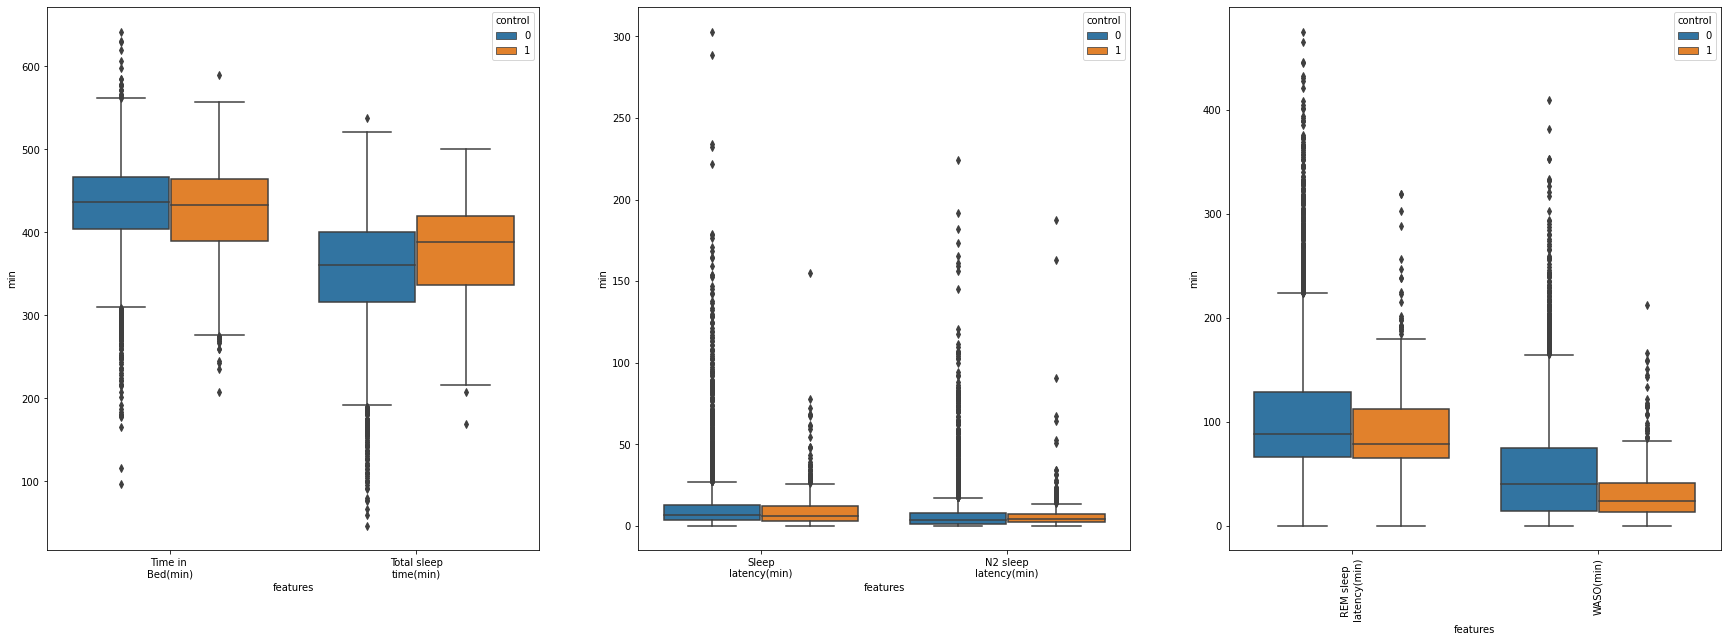

In [23]:
# 단위가 min인 데이터
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))

count = 0
for i in range(3):
    data = pd.concat([data_diag, minutes_data.iloc[:, count:count+2]], axis=1)
    count += 2
    data = pd.melt(data, id_vars="control", var_name="features", value_name="min")
    sns.boxplot(x="features", y="min", hue="control", data=data, ax=axs[i])

plt.xticks(rotation=90)

(array([0, 1]),
 [Text(0, 0, 'Baseline \nsleep SaO2'), Text(1, 0, 'Lowest SaO2 (%)')])

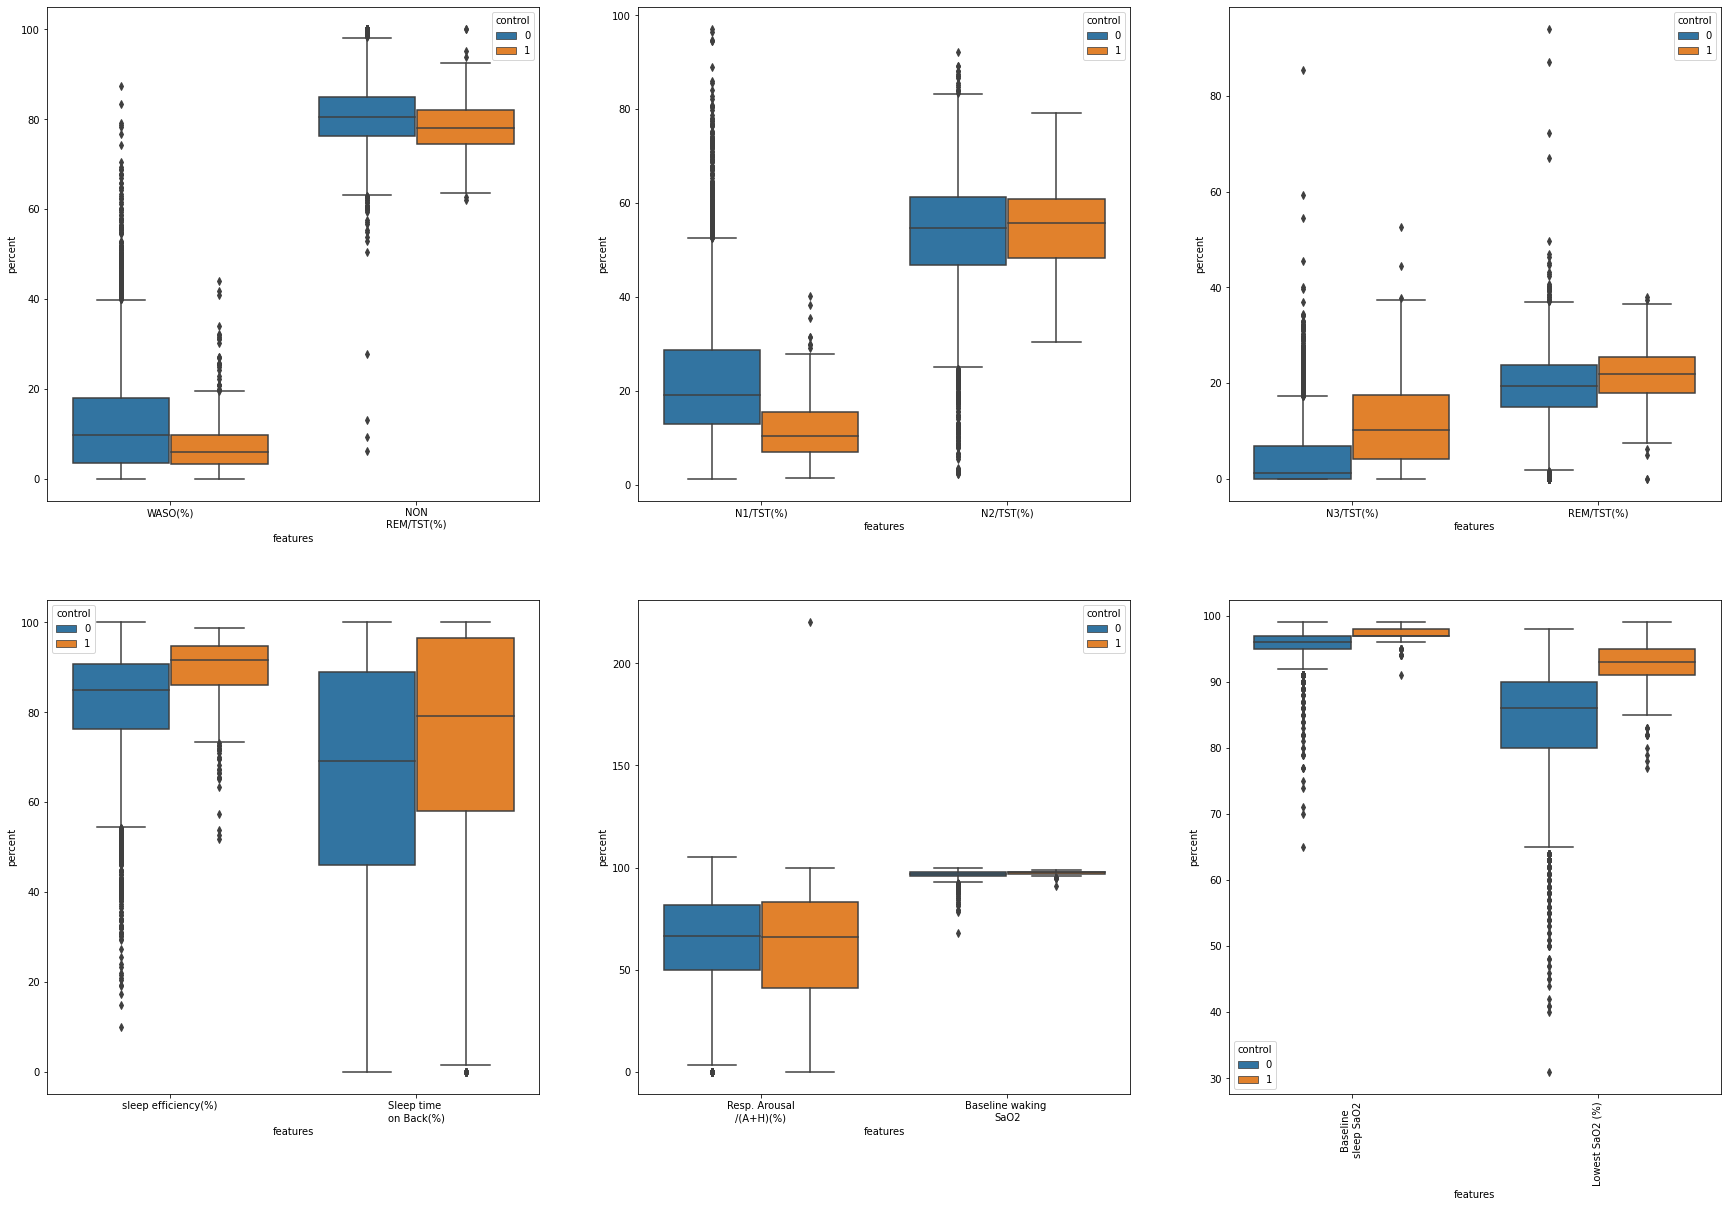

In [24]:
# 단위가 퍼센트인 데이터
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 20))

count = 0
for i in range(2):
    for j in range(3):
        data = pd.concat([data_diag, percent_data.iloc[:, count:count+2]], axis=1)
        count += 2
        data = pd.melt(data, id_vars="control", var_name="features", value_name="percent")
        sns.boxplot(x="features", y="percent", hue="control", data=data, ax=axs[i][j])

plt.xticks(rotation=90)

In [50]:
index_data[index_data['REM Arousal \nindex(h)'] == 999] # 이상치

,Total Aroual \nindex(/h),Respiratory \nAroual index(/h),Snore Aroual \nindex(/h),RERA \nindex(/h),Spontaneous \nAroual index(/h),Movement \nAroual index(/h),REM Arousal \nindex(h),NREM Arousal \nindex(h),Supine \nArousal index(h),Lateral \nArousal index(h),...,Supine0\nA+H+RERA_Index(h),Lateral A+H+RERA_\nIndex(h),REM A+H+RERA \nIndex(/h),NREM A+H+RERA \nIndex(/h),ODI,90%ODI,Total \nLMI =PLMI(/h),Total LM AI(/h),PLM \nAI(/h),MAI(/h)
1589,43.6,32.8,1.8,1.0,7.7,0.4,999.0,44.0,89.7,29.7,...,82.1,20.2,32.0,34.6,13.2,3.6,0.8,0.4,0.0,0.4


In [51]:
index_data['REM Arousal \nindex(h)'].replace({999:np.nan}, inplace=True)

/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_17857/2283909778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_data['REM Arousal \nindex(h)'].replace({999:np.nan}, inplace=True)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

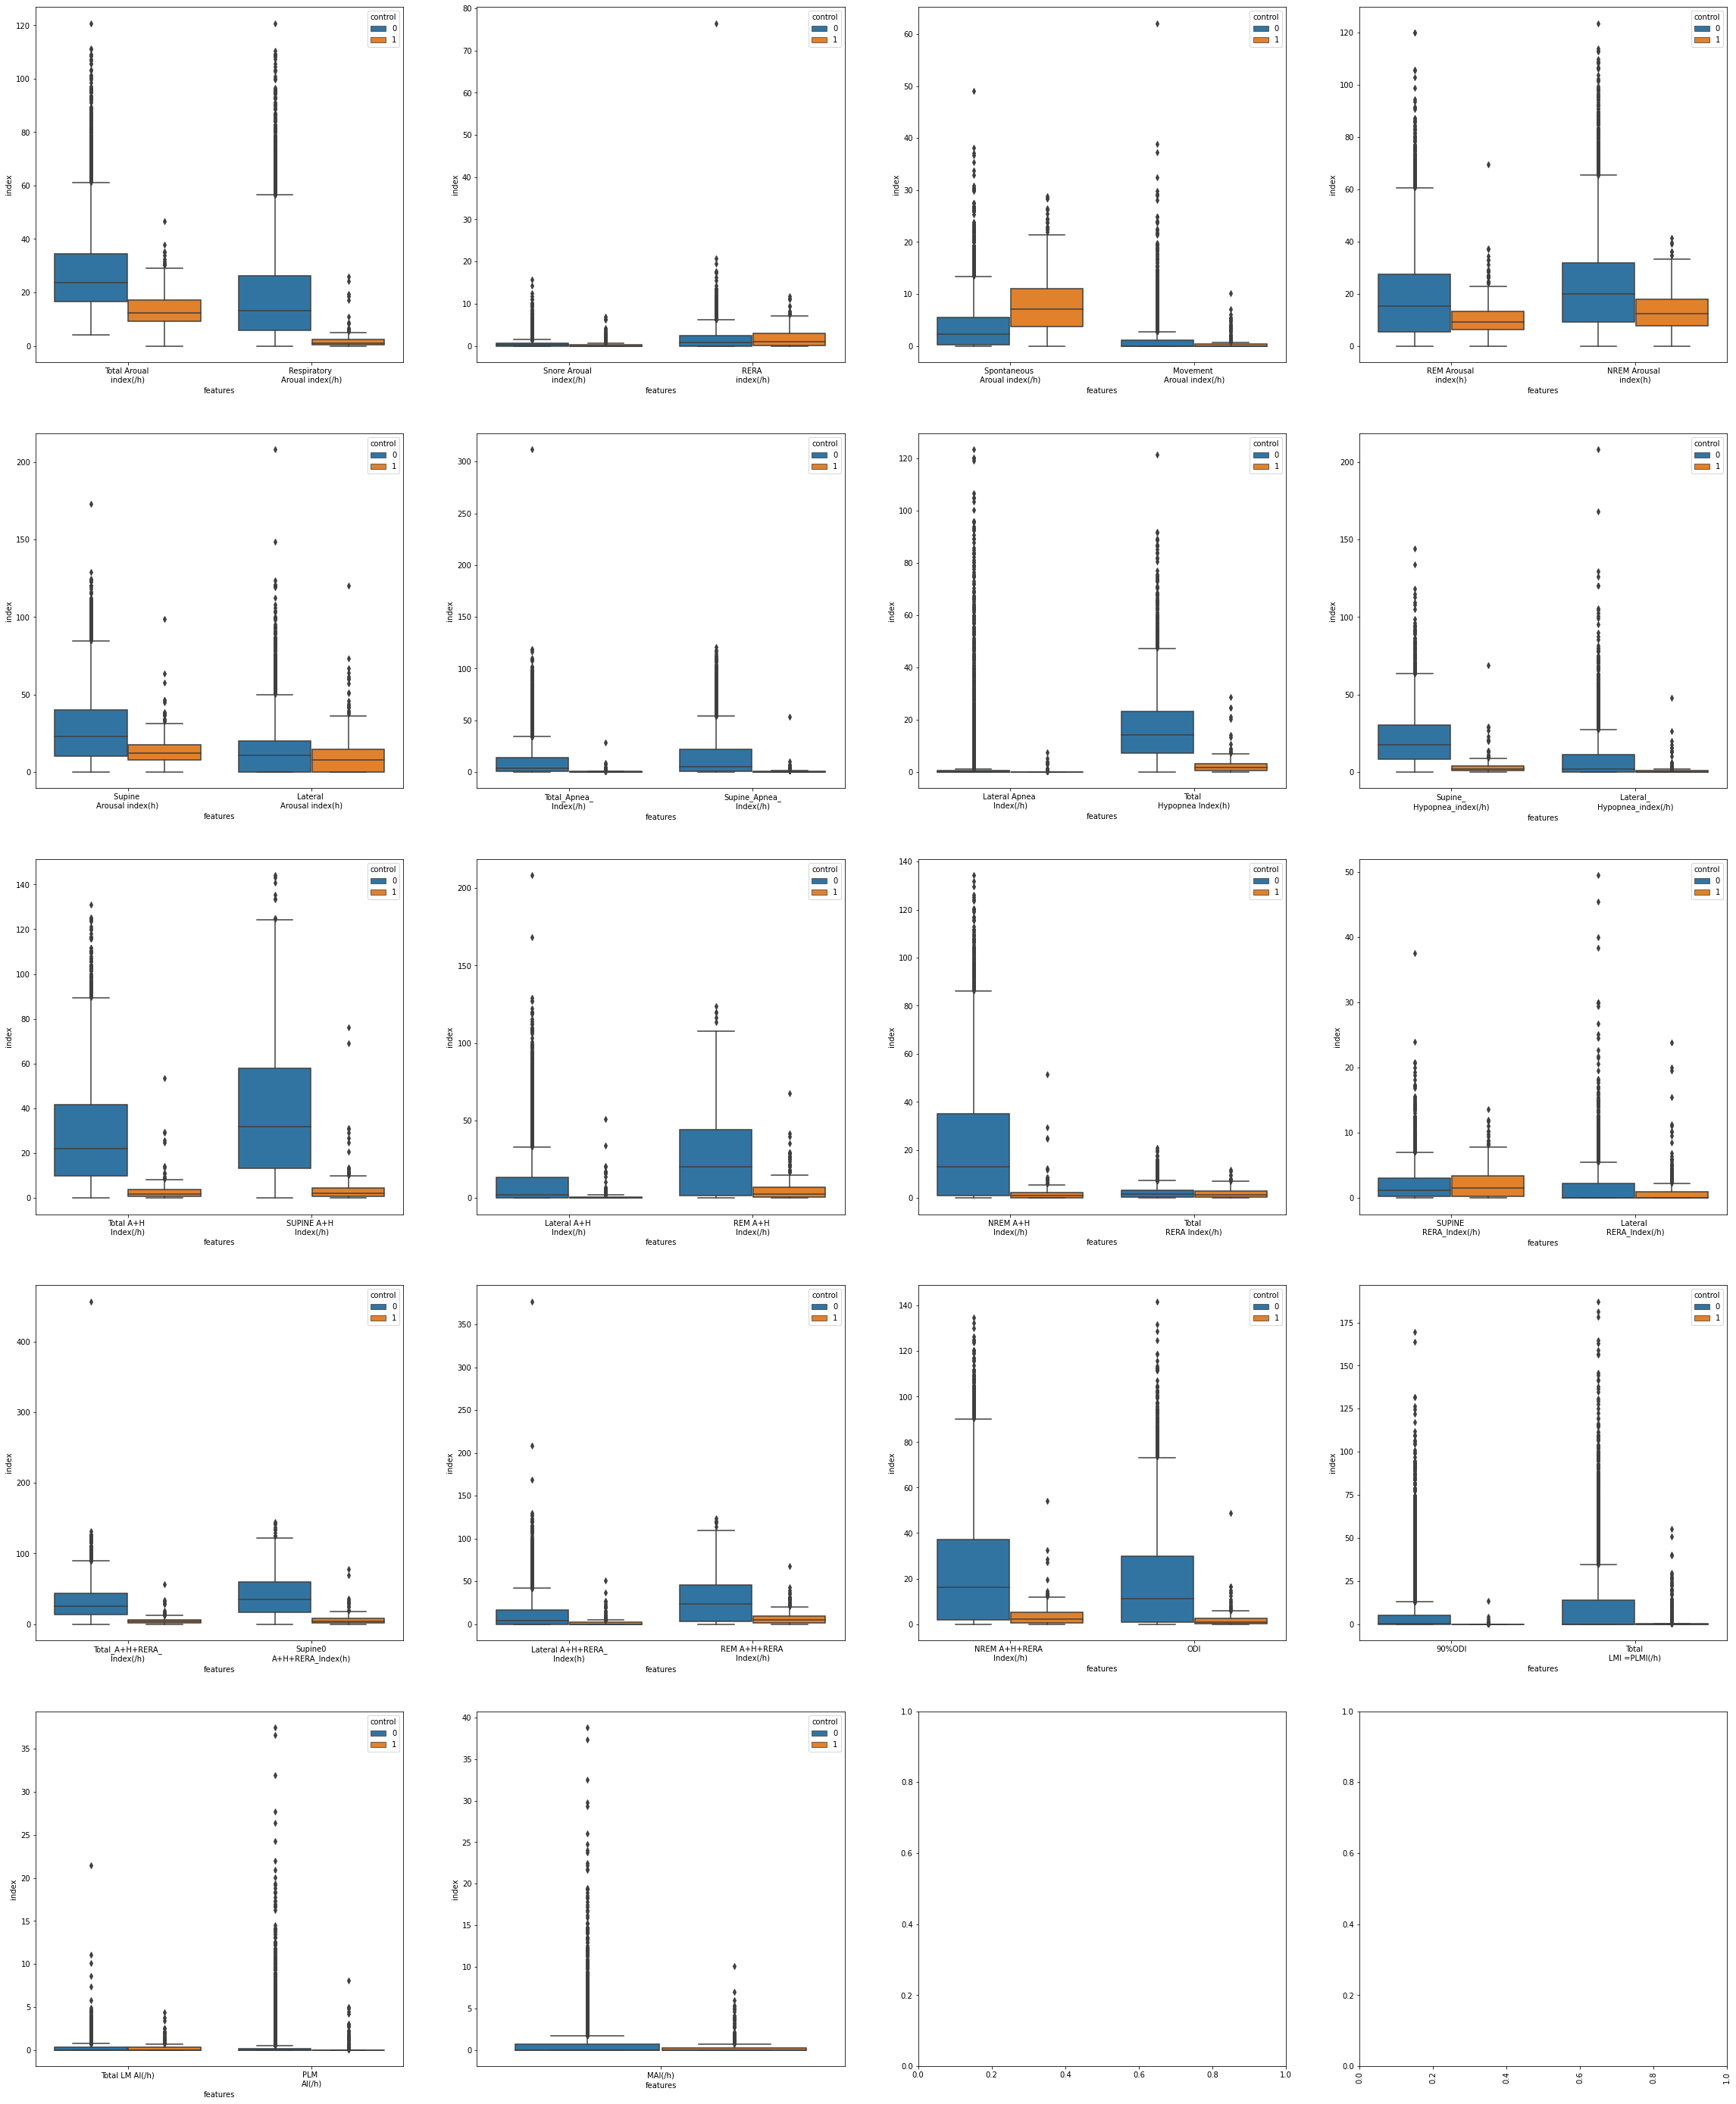

In [52]:
# 지수(index) 데이터
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(40, 50))

count = 0
for i in range(5):
    for j in range(4):
        if count >= len(index_data.columns):
            break
        data = pd.concat([data_diag, index_data.iloc[:, count:count+2]], axis=1)
        count += 2
        data = pd.melt(data, id_vars="control", var_name="features", value_name="index")
        sns.boxplot(x="features", y="index", hue="control", data=data, ax=axs[i][j])
        
plt.xticks(rotation=90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

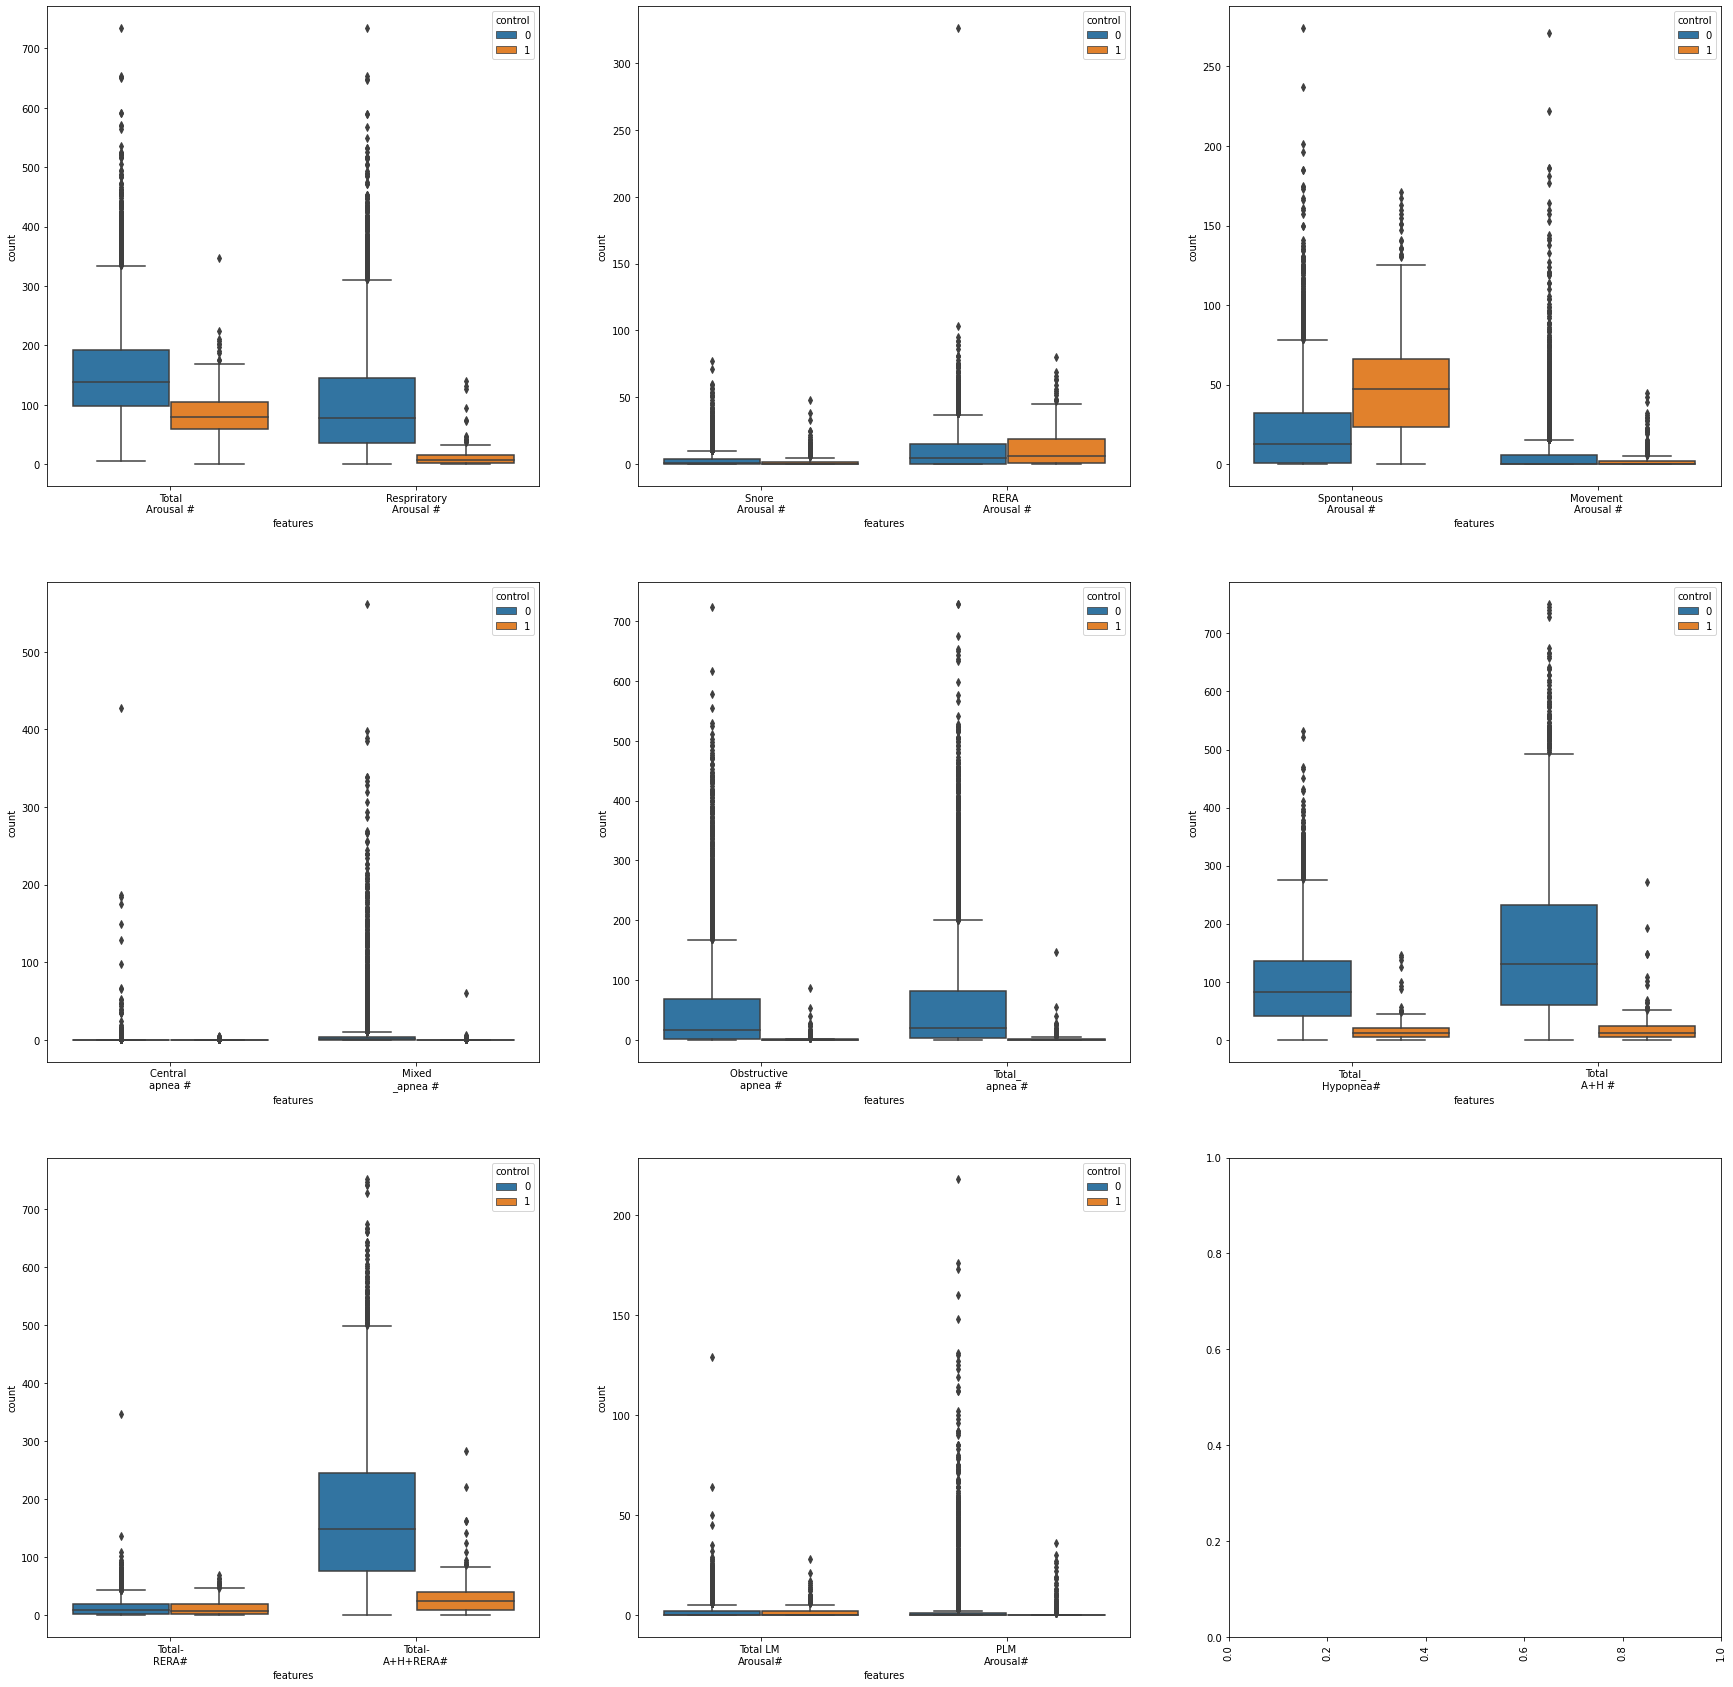

In [32]:
# 횟수 데이터
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 30))

count = 0
for i in range(3):
    for j in range(3):
        if i == 2 and j == 2:
            break
        data = pd.concat([data_diag, count_data.iloc[:, count:count+2]], axis=1)
        count += 2
        data = pd.melt(data, id_vars="control", var_name="features", value_name="count")
        sns.boxplot(x="features", y="count", hue="control", data=data, ax=axs[i][j])

plt.xticks(rotation=90)

<AxesSubplot:xlabel='features', ylabel='sec'>

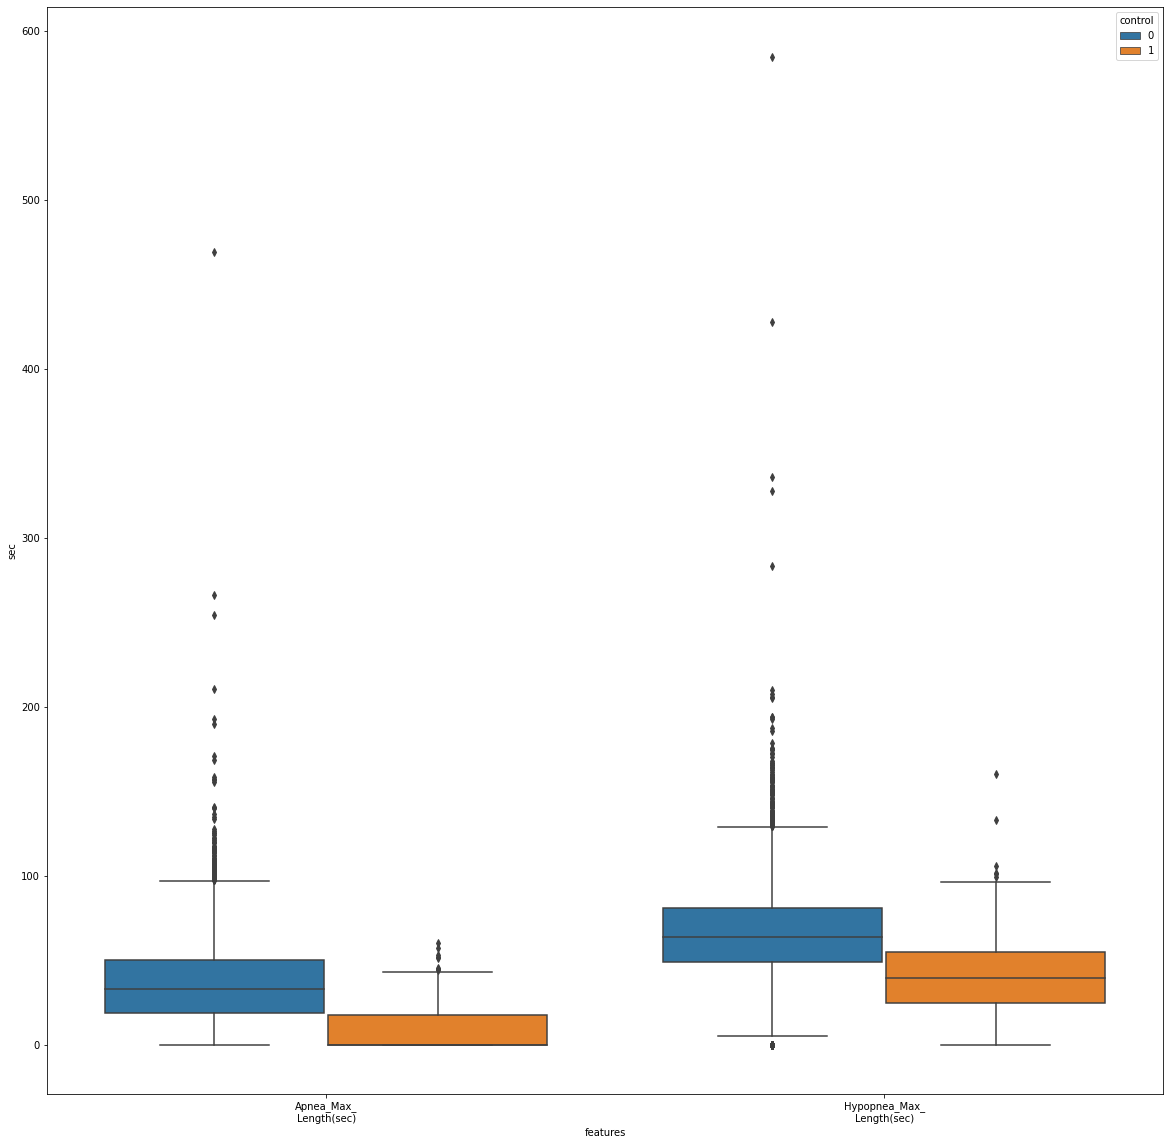

In [33]:
# 단위가 sec인 데이터
plt.figure(figsize=(20, 20))
data = pd.concat([data_diag, seconds_data], axis=1)
data = pd.melt(data, id_vars="control", var_name="features", value_name="sec")
sns.boxplot(x="features", y="sec", hue="control", data=data)

In [42]:
numerical_data.iloc[:, 0:3]

,height,weight,BMI
0,167.0,60.0,21.51
1,166.0,53.0,19.23
2,174.0,74.0,24.44
3,163.0,63.5,23.90
4,150.0,61.0,27.11
...,...,...,...
5476,160.0,47.0,18.40
5477,145.0,65.0,30.90
5478,154.0,76.0,32.00
5479,154.0,50.0,21.10


In [46]:
# 이상치 처리
Q1 = numerical_data.iloc[:, 0:3].quantile(q=0.25)
Q3 = numerical_data.iloc[:, 0:3].quantile(q=0.75)
IQR = Q3 - Q1

IQR_df = numerical_data[(numerical_data.iloc[:, 0] <= Q3[0]+1.5*IQR[0]) & (numerical_data.iloc[:, 0] >= Q1[0]-1.5*IQR[0])]
IQR_df = IQR_df[(IQR_df.iloc[:, 1] <= Q3[1]+1.5*IQR[1]) & (IQR_df.iloc[:, 1] >= Q1[1]-1.5*IQR[1])]
IQR_df = IQR_df[(IQR_df.iloc[:, 2] <= Q3[2]+1.5*IQR[2]) & (IQR_df.iloc[:, 2] >= Q1[2]-1.5*IQR[2])]
IQR_df = IQR_df.iloc[:, 0:3]

print('original_df :', len(numerical_data))
print('IQR_df :', len(IQR_df))

original_df : 5479
IQR_df : 5272


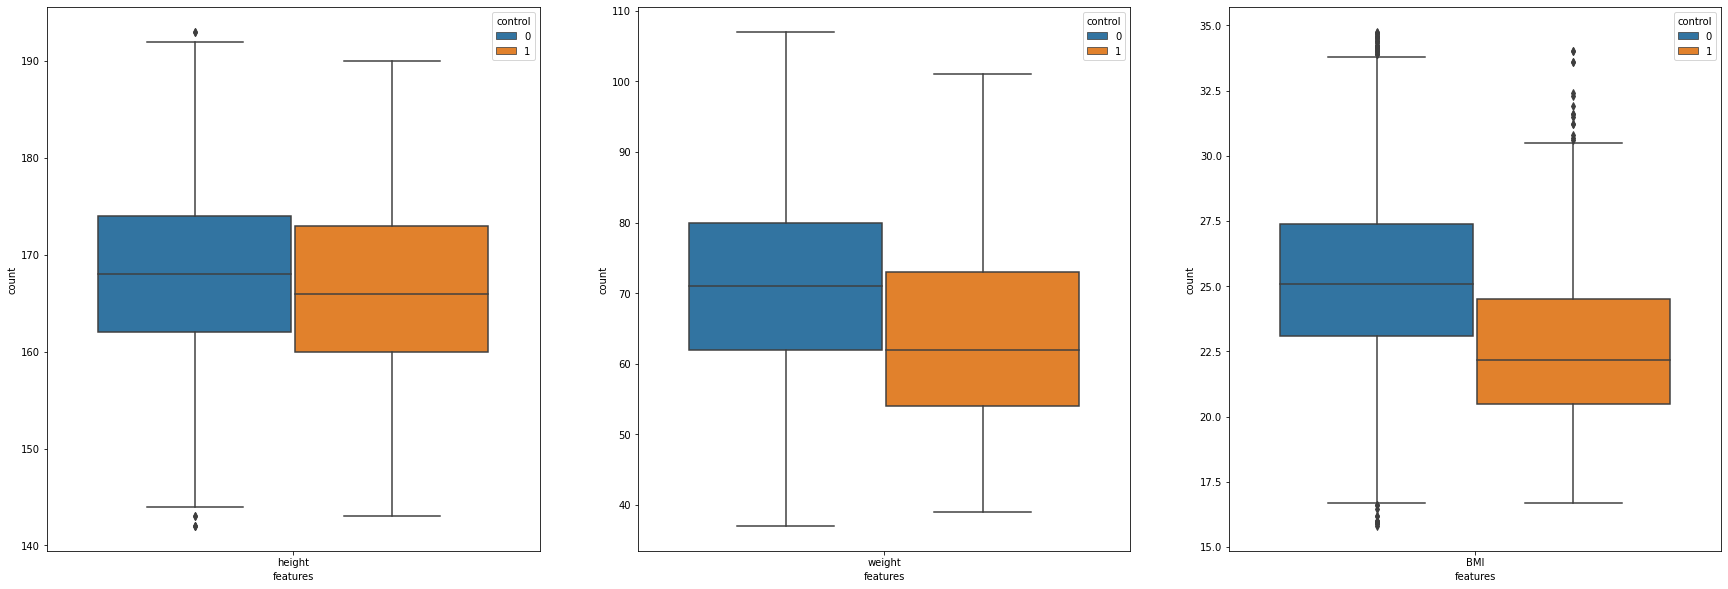

In [48]:
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))

for i in range(3):
    data = pd.concat([data_diag, IQR_df.iloc[:, [i]]], axis=1)
    data = pd.melt(data, id_vars="control", var_name="features", value_name="count")
    sns.boxplot(x="features", y="count", hue="control", data=data, ax=axs[i])

In [79]:
control_numerical_data = pd.concat([total_data[['age', 'control', 'sex']], numerical_data], axis=1)
correlations = control_numerical_data.corr()['control'].sort_values()

print('most positive 15:\n', correlations.tail(15))
print()
print('most negative 15:\n', correlations.head(15))

most positive 15:
 SUPINE \nRERA_Index(/h)           0.018588
N2/TST(%)                         0.023484
RERA \nArousal #                  0.033743
Sleep time \non Back(%)           0.068456
Total sleep\ntime(min)            0.089874
REM/TST(%)                        0.095531
sex                               0.146486
sleep efficiency(%)               0.158371
Baseline waking \nSaO2            0.171845
Baseline \nsleep SaO2             0.196007
Spontaneous \nAroual index(/h)    0.224999
Spontaneous \nArousal #           0.256265
N3/TST(%)                         0.269455
Lowest SaO2 (%)                   0.271847
control                           1.000000
Name: control, dtype: float64

most negative 15:
 Supine0\nA+H+RERA_Index(h)       -0.319611
SUPINE A+H \nIndex(/h)           -0.315254
age                              -0.314933
Total-\nA+H+RERA#                -0.304479
Total \nA+H #                    -0.298115
Total_\nHypopnea#                -0.295121
Total_A+H+RERA_\nIndex(/h)  

In [82]:
pos_corr_data = control_numerical_data[['control', 'Lowest SaO2 (%)', 'N3/TST(%)', 'Spontaneous \nArousal #', 'Spontaneous \nAroual index(/h)']]
pos_corr_data_corrs = pos_corr_data.corr()
pos_corr_data_corrs

,control,Lowest SaO2 (%),N3/TST(%),Spontaneous \nArousal #,Spontaneous \nAroual index(/h)
control,1.000000,0.271847,0.269455,0.256265,0.224999
Lowest SaO2 (%),0.271847,1.000000,0.197263,0.391057,0.375951
N3/TST(%),0.269455,0.197263,1.000000,0.144270,0.125717
Spontaneous \nArousal #,0.256265,0.391057,0.144270,1.000000,0.965732
Spontaneous \nAroual index(/h),0.224999,0.375951,0.125717,0.965732,1.000000


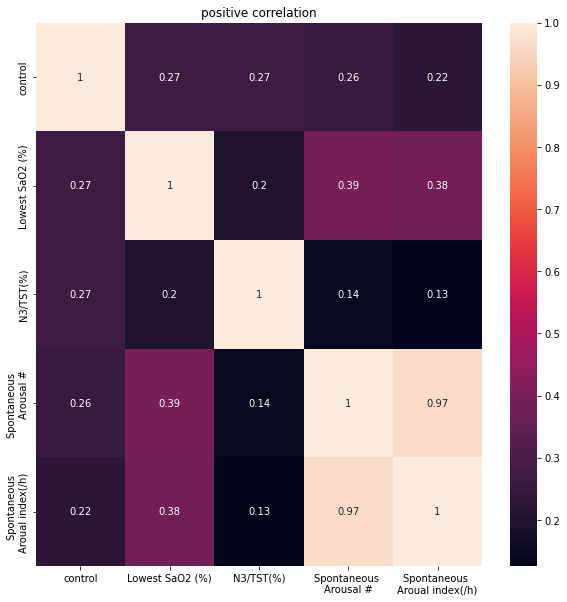

In [83]:
plt.figure(figsize=(10, 10))

sns.heatmap(pos_corr_data_corrs, annot=True)
plt.title('positive correlation');

In [80]:
neg_corr_data = control_numerical_data[['control', 'Supine0\nA+H+RERA_Index(h)', 'SUPINE A+H \nIndex(/h)', 'age', 'Total-\nA+H+RERA#']]
neg_corr_data_corrs = neg_corr_data.corr()
neg_corr_data_corrs

,control,Supine0\nA+H+RERA_Index(h),SUPINE A+H \nIndex(/h),age,Total-\nA+H+RERA#
control,1.000000,-0.319611,-0.315254,-0.314933,-0.304479
Supine0\nA+H+RERA_Index(h),-0.319611,1.000000,0.994297,0.213719,0.830018
SUPINE A+H \nIndex(/h),-0.315254,0.994297,1.000000,0.216624,0.831006
age,-0.314933,0.213719,0.216624,1.000000,0.119427
Total-\nA+H+RERA#,-0.304479,0.830018,0.831006,0.119427,1.000000


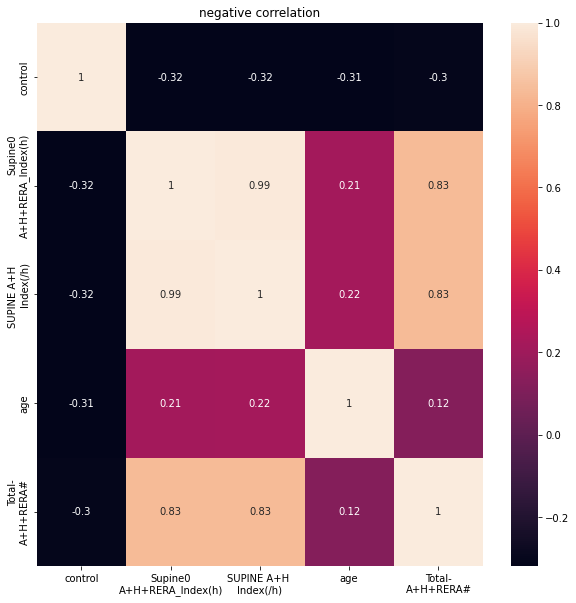

In [81]:
plt.figure(figsize=(10, 10))

sns.heatmap(neg_corr_data_corrs, annot=True)
plt.title('negative correlation');

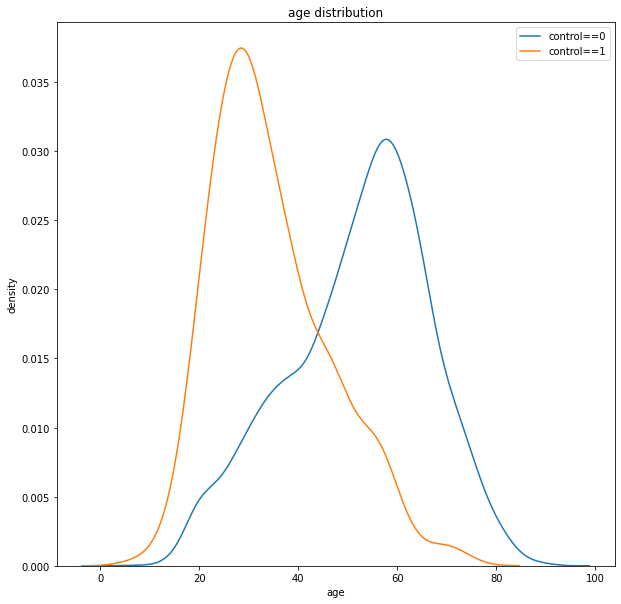

In [55]:
plt.figure(figsize=(10, 10))

sns.kdeplot(control_numerical_data.loc[control_numerical_data['control'] == 0,'age'], label='control==0')
sns.kdeplot(control_numerical_data.loc[control_numerical_data['control'] == 1,'age'], label='control==1')

plt.legend();
plt.xlabel('age');
plt.ylabel('density');
plt.title('age distribution');

In [58]:
bmi_anomaly_indices = control_numerical_data[control_numerical_data['BMI'] == 999].index
control_numerical_data.drop(bmi_anomaly_indices, inplace=True)

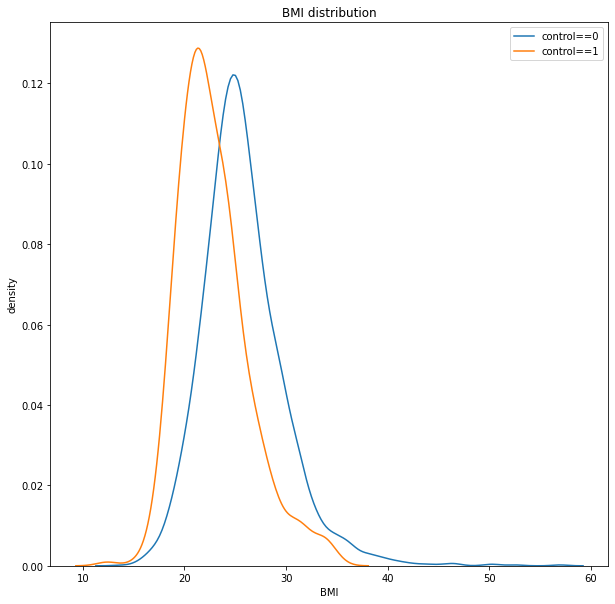

In [59]:
plt.figure(figsize=(10, 10))

sns.kdeplot(control_numerical_data.loc[control_numerical_data['control'] == 0,'BMI'], label='control==0')
sns.kdeplot(control_numerical_data.loc[control_numerical_data['control'] == 1,'BMI'], label='control==1')

plt.legend();
plt.xlabel('BMI');
plt.ylabel('density');
plt.title('BMI distribution');

In [63]:
age_data = control_numerical_data[['age','control']]
age_data['binned age'] = pd.cut(age_data['age'], bins=np.linspace(10, 80, num=15))
age_data.head()

/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_17857/4194351681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['binned age'] = pd.cut(age_data['age'], bins=np.linspace(10, 80, num=15))


,age,control,binned age
0,52,1,"(50.0, 55.0]"
1,65,0,"(60.0, 65.0]"
2,53,0,"(50.0, 55.0]"
3,53,0,"(50.0, 55.0]"
4,55,0,"(50.0, 55.0]"


In [64]:
age_groups  = age_data.groupby('binned age').mean()
age_groups

,age,control
binned age,,
"(10.0, 15.0]",14.000000,0.384615
"(15.0, 20.0]",18.825000,0.241667
"(20.0, 25.0]",23.195349,0.311628
"(25.0, 30.0]",28.254125,0.293729
"(30.0, 35.0]",33.134409,0.174731
"(35.0, 40.0]",38.053571,0.135204
"(40.0, 45.0]",43.213303,0.077982
"(45.0, 50.0]",48.142086,0.057554
"(50.0, 55.0]",53.037846,0.020378


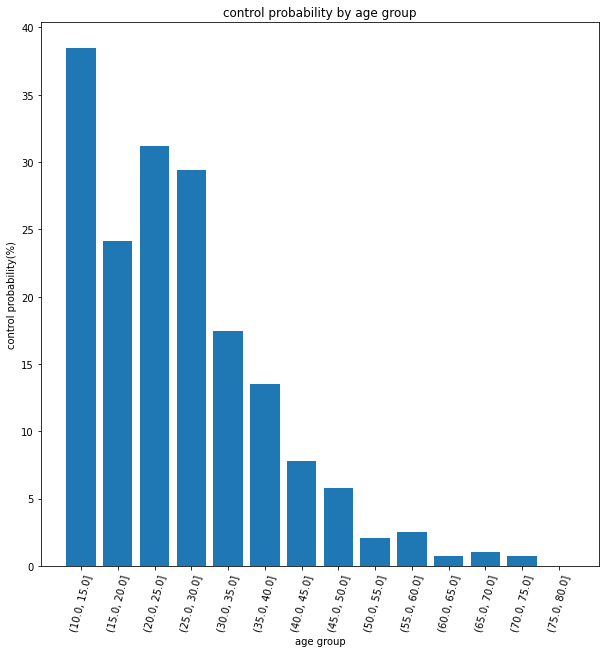

In [65]:
plt.figure(figsize=(10, 10))

plt.bar(age_groups.index.astype(str), 100*age_groups['control'])

# 수면 장애가 없을 확률
plt.xticks(rotation=75);
plt.xlabel('age group');
plt.ylabel('control probability(%)')
plt.title('control probability by age group');

In [75]:
bmi_data = control_numerical_data[['BMI','control']]
bmi_data['binned bmi'] = pd.cut(bmi_data['BMI'], bins=np.linspace(10, 40, num=7))
bmi_data.head()

/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_17857/3609246575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_data['binned bmi'] = pd.cut(bmi_data['BMI'], bins=np.linspace(10, 40, num=7))


,BMI,control,binned bmi
0,21.51,1,"(20.0, 25.0]"
1,19.23,0,"(15.0, 20.0]"
2,24.44,0,"(20.0, 25.0]"
3,23.90,0,"(20.0, 25.0]"
4,27.11,0,"(25.0, 30.0]"


In [76]:
bmi_groups  = bmi_data.groupby('binned bmi').mean()
bmi_groups

,BMI,control
binned bmi,,
"(10.0, 15.0]",13.533333,0.333333
"(15.0, 20.0]",18.803517,0.244186
"(20.0, 25.0]",23.004240,0.106119
"(25.0, 30.0]",27.046134,0.031791
"(30.0, 35.0]",31.787776,0.039370
"(35.0, 40.0]",36.887670,0.000000


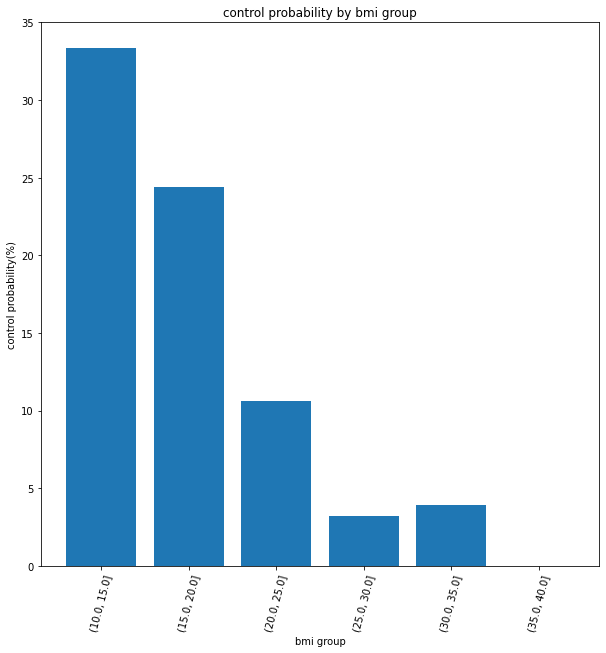

In [78]:
plt.figure(figsize=(10, 10))

plt.bar(bmi_groups.index.astype(str), 100*bmi_groups['control'])

# 수면 장애가 없을 확률
plt.xticks(rotation=75);
plt.xlabel('bmi group');
plt.ylabel('control probability(%)')
plt.title('control probability by bmi group');